# DESARROLLO DE LA PRUEBA

# Librerias

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport 
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split 


## 1. Lectura de los datos

In [2]:
data= pd.read_csv("Cruceros.csv")

## 2. Mostrar columnas

In [3]:
data.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


## 3. Calcular estadísticas básicas de los datos, interpretarlos y enunciar sus observaciones

In [4]:
# tipos de variables

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [6]:
#cantidad de datos
len_data=len(data)
print("Cantidad de observaciones: ",len(data))

Cantidad de observaciones:  158


In [7]:
#Valores unicos
s=[print("La variable " + name + " tiene como valores unicos: \n"+ ", ".join(map(str,data[name].unique())),"\n") 
for name in list(data.select_dtypes(include='object').columns)]

La variable Ship_name tiene como valores unicos: 
Journey, Quest, Celebration, Conquest, Destiny, Ecstasy, Elation, Fantasy, Fascination, Freedom, Glory, Holiday, Imagination, Inspiration, Legend, Liberty*, Miracle, Paradise, Pride, Sensation, Spirit, Triumph, Valor, Victory, Century, Constellation, Galaxy, Infinity, Mercury, Millenium, Solstice, Summit, Xpedition, Zenith, Allegra, Atlantica, Classica, Europa, Fortuna, Magica, Marina, Mediterranea, Romantica, Serena, Victoria, Serenity, Symphony, QueenElizabethII, QueenMary2, QueenVictoria, Magic, Wonder, Amsterdam, Eurodam, Maasdam, Noordam, Oosterdam, Prinsendam, Rotterdam, Ryndam, Statendam, Veendam, Volendam, Westerdam, Zaandam, Zuiderdam, Armonia, Fantasia, Lirica, Melody, Musica, Opera, Rhapsody, Sinfonia, Crown, Dawn, Dream, Gem, Jewel, Majesty, PrideofAloha, PrideofAmerica, Sea, Star, Sun, Wind, Insignia, Nautica, Regatta, MarcoPolo, Arcadia, Artemis, Aurora, Oceana, Oriana, Ventura, Caribbean, Coral, Diamond, Emerald, Golden, 

In [107]:
# Distribution of cruise_line
data['Cruise_line'].value_counts()

Royal_Caribbean      23
Carnival             22
Princess             17
Holland_American     14
Norwegian            13
Costa                11
Celebrity            10
MSC                   8
Star                  6
P&O                   6
Regent_Seven_Seas     5
Silversea             4
Oceania               3
Seabourn              3
Windstar              3
Cunard                3
Disney                2
Crystal               2
Azamara               2
Orient                1
Name: Cruise_line, dtype: int64

In [23]:
# Exploración de los datos
ProfileReport(data, title="EDA  Data", minimal=True)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]


In [8]:
# Variables categoricas
data.describe(include=[object])

,Ship_name,Cruise_line
count,158,158
unique,138,20
top,Spirit,Royal_Caribbean
freq,4,23


In [9]:
# Variables numericas
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,158.0,15.689873,7.615691,4.000,10.0000,14.000,20.0000,48.00
Tonnage,158.0,71.284671,37.229540,2.329,46.0130,71.899,90.7725,220.00
passengers,158.0,18.457405,9.677095,0.660,12.5350,19.500,24.8450,54.00
length,158.0,8.130633,1.793474,2.790,7.1000,8.555,9.5100,11.82
cabins,158.0,8.830000,4.471417,0.330,6.1325,9.570,10.8850,27.00
passenger_density,158.0,39.900949,8.639217,17.700,34.5700,39.085,44.1850,71.43
crew,158.0,7.794177,3.503487,0.590,5.4800,8.150,9.9900,21.00


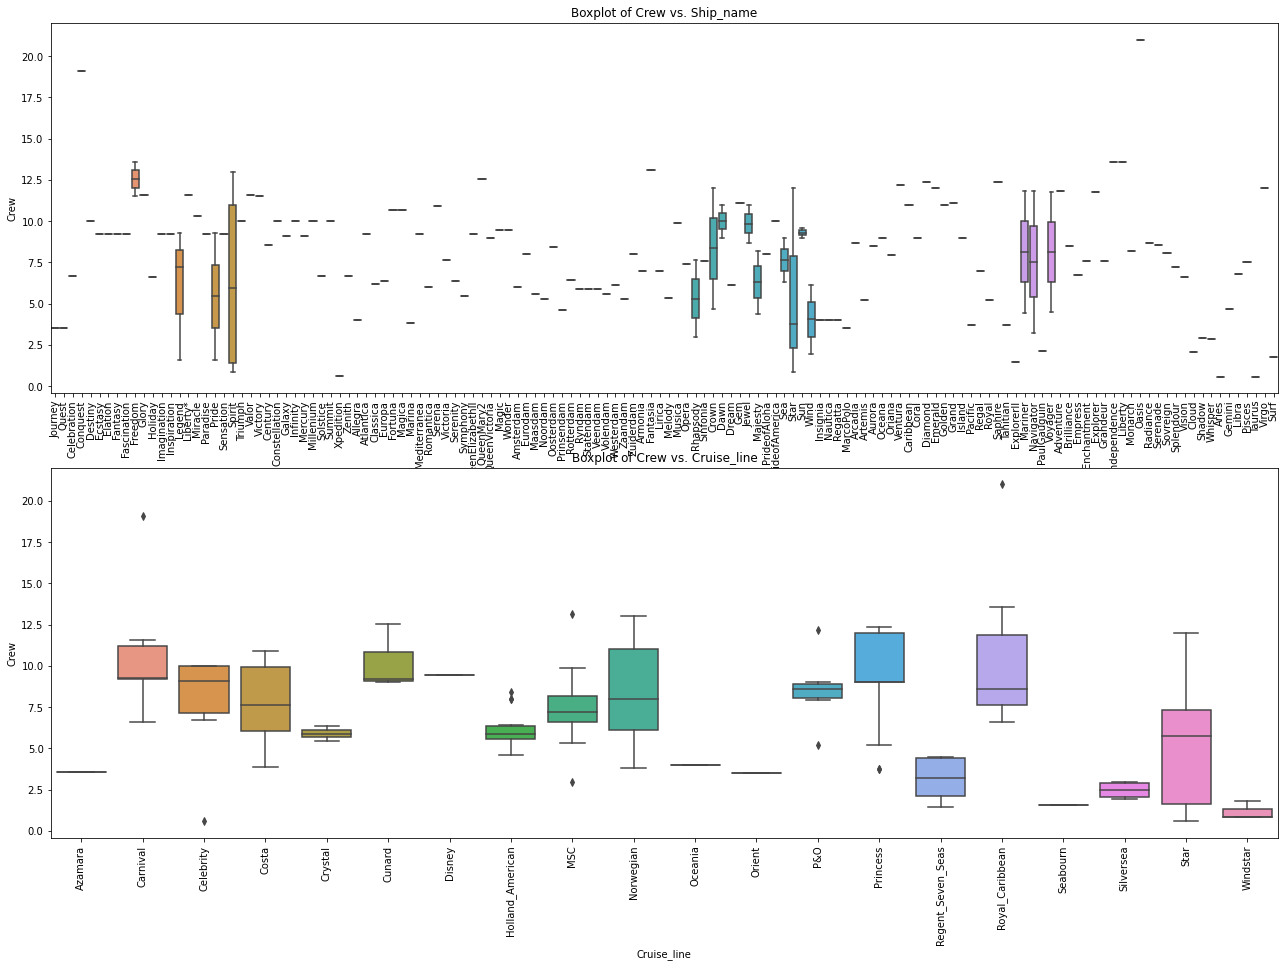

In [21]:
# variables discretas vs variable de respuesta
plt.figure(figsize=(22,15))
vars_to_plot = data.select_dtypes(include=['object']).columns.tolist()
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,1,i+1)
    sns.boxplot(x = var, y='crew', data = data)
    title_string = "Boxplot of Crew vs. " + var
    plt.ylabel("Crew")
    plt.title(title_string)
    plt.xticks(fontsize = 10, rotation=90) 

c:\Users\Kevin Palomino\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


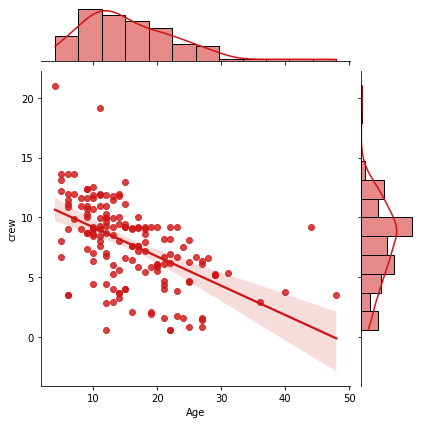

In [34]:
# variable age vs crew
sns.jointplot(data['Age'],data['crew'], kind="reg", color="#ce1414")

c:\Users\Kevin Palomino\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


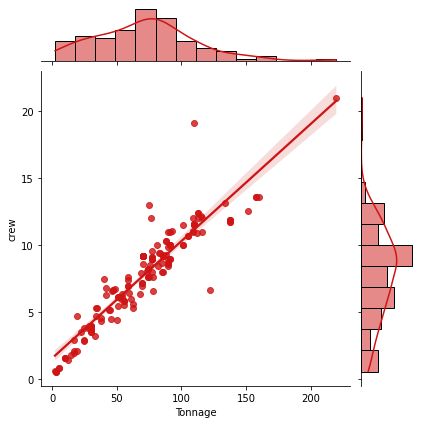

In [55]:
# variable Tonnage vs crew
sns.jointplot(data['Tonnage'],data['crew'], kind="reg", color="#ce1414")

c:\Users\Kevin Palomino\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


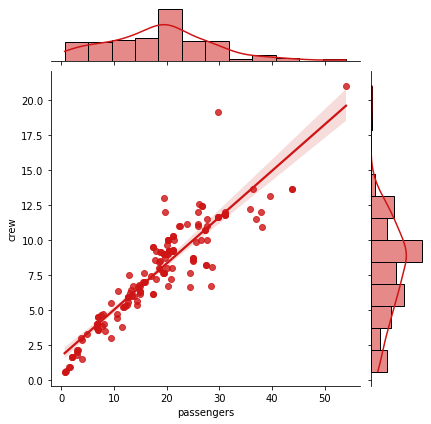

In [56]:
# variable passengers vs crew
sns.jointplot(data['passengers'],data['crew'], kind="reg", color="#ce1414")

c:\Users\Kevin Palomino\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


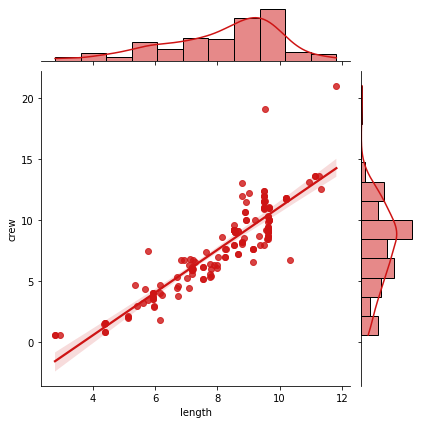

In [57]:
# variable length vs crew
sns.jointplot(data['length'],data['crew'], kind="reg", color="#ce1414")

c:\Users\Kevin Palomino\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


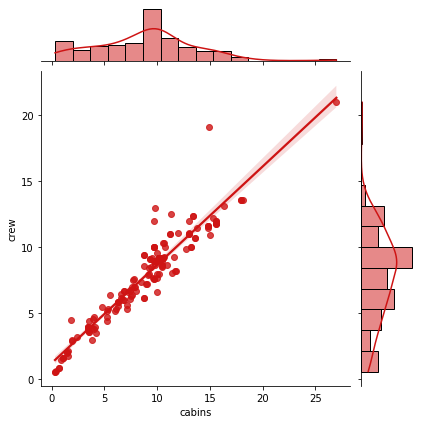

In [58]:
# variable age vs crew
sns.jointplot(data['cabins'],data['crew'], kind="reg", color="#ce1414")

c:\Users\Kevin Palomino\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


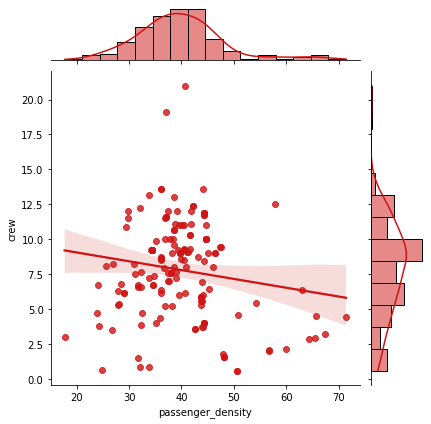

In [59]:
# variable age vs crew
sns.jointplot(data['passenger_density'],data['crew'], kind="reg", color="#ce1414")

In [61]:
# Create a correlation matrix
corr    = data.corr()
pos_cor = corr['crew'] >0
neg_cor = corr['crew'] <0
corr['crew'][pos_cor].sort_values(ascending = False)
#This prints out the coefficients that are positively correlated with Crew.

crew          1.000000
cabins        0.950823
Tonnage       0.927569
passengers    0.915234
length        0.895857
Name: crew, dtype: float64

In [62]:
corr['crew'][neg_cor].sort_values()

Age                 -0.530657
passenger_density   -0.155509
Name: crew, dtype: float64

## 4. Seleccionar las columnas que se consideran importantes para predecir el tamaño de la tripulación (crew)

### 4.1 Feature Selection

In [74]:
#Basic method
datafm=data.select_dtypes(exclude=['object']).copy()
Y_train=datafm.crew
datafm.drop(labels=['crew'],axis=1, inplace=True)
X_train=datafm.copy()
sel = VarianceThreshold(threshold=0)
sel.fit(X_train) 
print("Number of features that are not constant: "+str(sum(sel.get_support())))
print("features that are not constant: "+str(X_train.columns[sel.get_support()].tolist()))

Number of features that are not constant: 6
features that are not constant: ['Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density']


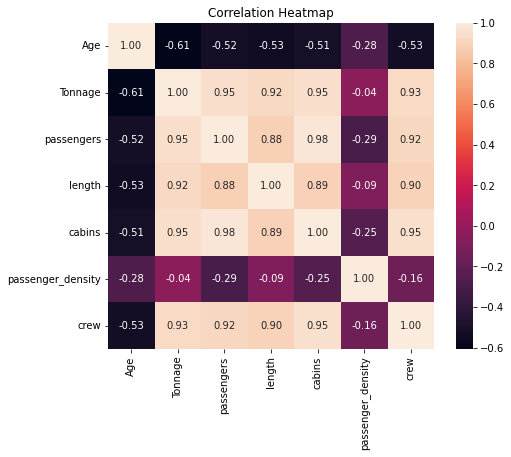

In [115]:
# Create correlation heatmap method
corr_matrix = data.corr()
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=0)           
plt.show()


<AxesSubplot:>

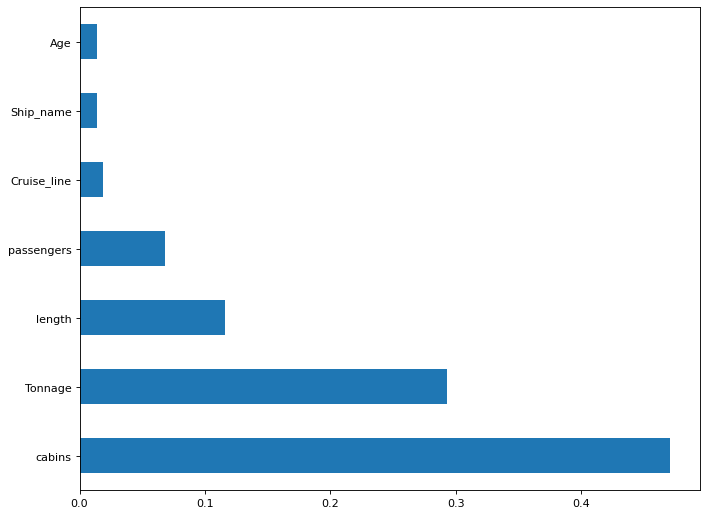

In [112]:
#Random Forest Importance (feature importance)
X_train1=data.iloc[:,:-1]
X_train1['Ship_name']=X_train1['Ship_name'].astype('category').cat.codes
X_train1['Cruise_line']=X_train1['Cruise_line'].astype('category').cat.codes
clf = RandomForestRegressor(n_estimators=100, random_state=0)
clf.fit(X_train1, Y_train) 
y_pred = clf.predict(X_train1)
# visualize feature importance
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
feat_importances = pd.Series(clf.feature_importances_, index= X_train1.columns)
feat_importances.nlargest(7).plot(kind='barh')

In [106]:
# LASSO regression embedded method (L1 regularization)


scaler = StandardScaler()
scaler.fit(X_train1)
sel_ = SelectFromModel(Lasso(alpha=1))
sel_.fit(scaler.transform(X_train1), Y_train)
selected_feat = X_train1.columns[(sel_.get_support())]
print('total features: {}'.format((X_train1.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))
print("Feature selected: "+ str(X_train1.columns[(sel_.get_support())].tolist()))

total features: 8
selected features: 3
features with coefficients shrank to zero: 5
Feature selected: ['Tonnage', 'length', 'cabins']


### 6. Utiliza “one-hot encoding” para las características categóricas


In [122]:
# one-hot encoding for ship_name
ship_name_data=pd.get_dummies(data['Ship_name'])
print('counts of variables: {}'.format(ship_name_data.shape[1]))
ship_name_data.head()

counts of variables: 138


,Adventure,Allegra,Amsterdam,Arcadia,Aries,Armonia,Artemis,Atlantica,Aurora,Brilliance,...,Volendam,Voyager,Westerdam,Whisper,Wind,Wonder,Xpedition,Zaandam,Zenith,Zuiderdam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
# one-hot encoding for cruise_line
cruise_line_data=pd.get_dummies(data['Cruise_line'])
print('counts of variables: {}'.format(cruise_line_data.shape[1]))
cruise_line_data.head()

counts of variables: 20


,Azamara,Carnival,Celebrity,Costa,Crystal,Cunard,Disney,Holland_American,MSC,Norwegian,Oceania,Orient,P&O,Princess,Regent_Seven_Seas,Royal_Caribbean,Seabourn,Silversea,Star,Windstar
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 7. Crea conjuntos de entrenamiento y prueba (utilice el 60 % de los datos para el entrenamiento y el restante para prueba).

In [230]:
# data_new=pd.concat([data.iloc[:,2:], cruise_line_data], axis=1)
data_best_model= data[['cabins','length','cabins','passengers','crew']]

In [231]:
train, test = train_test_split(data_best_model, test_size = 0.40, random_state = 100)
print("Training: ", len(train))
print("Test: ", len(test))

Training:  94
Test:  64


In [232]:
# training set
train_x=train.iloc[:,:-1].reset_index(drop="index")
train_y=train['crew'].reset_index(drop="index")

In [247]:
# testing set
test_x=test.iloc[:,:-1].reset_index(drop="index")
test_y=test['crew'].reset_index(drop="index")

### 8. Cree un modelo de aprendizaje automático para predecir el tamaño de la tripulación.


#### Model 1

In [255]:
from sklearn.ensemble import RandomForestRegressor
clf_rf =RandomForestRegressor(bootstrap=False, ccp_alpha=0.0,
                                             criterion="mse", max_depth=17,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=80, n_jobs=None,
                                             oob_score=False, random_state=280,
                                             verbose=0, warm_start=True)
clf_rf.fit(train_x, train_y)


c:\Users\Kevin Palomino\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Kevin Palomino\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=17,
                      max_features='auto', n_estimators=80, random_state=280,
                      warm_start=True)

In [256]:
def Plot_prediction(model,test_X,test_Y):
  clf_rf_probas = pd.Series(model.predict(test_X))
  random_pred=pd.concat([clf_rf_probas,test_Y],axis=1)
  predictions = clf_rf.predict(test_x)
  #Mean Absolute Error
  mae=round(np.mean(abs(predictions - test_y)),2)
  mape = 100 * (abs(predictions - test_Y) / test_Y)
  random_pred.columns=['Prediction', 'crew']
  random_pred.plot(kind="line",figsize=(20,6))
  accuracy = round(100 - np.mean(mape),2)
  plt.title(" Mae: "+ str(np.array(mae))+"  Accuracy: "+str(accuracy))

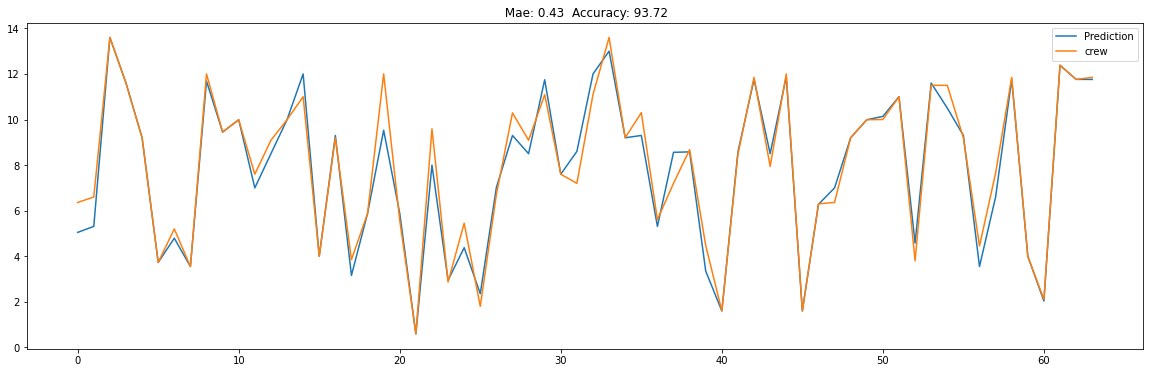

In [257]:
Plot_prediction(clf_rf,test_x,test_y)

### Optimized Model

In [260]:
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [258]:
param_grid = {
    'max_depth': [15, 16,17,18,19, 20, 21,17, None],
    'n_estimators': [80, 84, 85, 86, 90, 95,100, 150],
}
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Fitting 3 folds for each of 72 candidates, totalling 216 fits
 
-----------------------------------------------------------------------------
Best Hyperparameters: {'max_depth': 15, 'n_estimators': 100}
-----------------------------------------------------------------------------


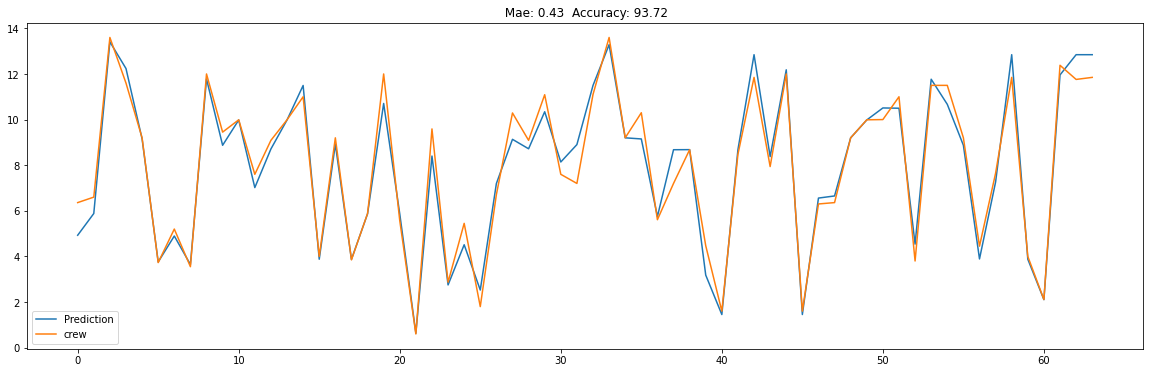

In [262]:
def Rf_selecFromModel(train_X,train_Y,test_X,test_Y):
  model =RandomForestRegressor(random_state=314, max_depth=15,n_estimators=100 )
  ftwo_scorer = make_scorer(mean_absolute_percentage_error)
  grid_search = GridSearchCV(estimator = model, scoring=ftwo_scorer,param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
  grid_search.fit(train_X, train_Y)
  print(' ')
  print("-----------------------------------------------------------------------------")
  print('Best Hyperparameters: %s' % grid_search.best_params_)
  print("-----------------------------------------------------------------------------")
  clf_rf_probas = pd.Series(grid_search.best_estimator_.predict(test_X))
  random_pred=pd.concat([clf_rf_probas,test_Y],axis=1)
  predictions = clf_rf.predict(test_x)
  #Mean Absolute Error
  mae=round(np.mean(abs(predictions - test_y)),2)
  mape = 100 * (abs(predictions - test_Y) / test_Y)
  random_pred.columns=['Prediction', 'crew']
  random_pred.plot(kind="line",figsize=(20,6))
  accuracy = round(100 - np.mean(mape),2)
  plt.title(" Mae: "+ str(np.array(mae))+"  Accuracy: "+str(accuracy))

Rf_selecFromModel(train_x,train_y,test_x,test_y)

In [264]:
# import xgboost as xg